In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

In [2]:
# Study data files
file_path = "cleansheet1.csv"

# Read the data 
flightdata = pd.read_csv(file_path)
flightdata.head()

,Month,Country to/from,Passengers In,Freight In,Mail In,Passengers Out,Freight Out,Mail Out,Year
0,Jan009,Argentina,"3,021",4.3,0.6,"1,959",8.3,0.0,2009
1,Jan009,New Zealand,627,76.3,0.0,"1,821",68.5,0.0,2009
2,Jan009,New Caledonia,"6,658",4.9,0.6,"5,365",68.6,1.3,2009
3,Jan009,Canada,"7,489",174.8,0.0,"6,424",105.2,0.0,2009
4,Jan009,China,"12,458",201.3,18.6,"11,163",142.4,2.9,2009


In [3]:
# Create a dataframe for country related info 
flight_cntry = flightdata[["Month", "Country to/from" , "Year"]]
flight_cntry.head()

,Month,Country to/from,Year
0,Jan009,Argentina,2009
1,Jan009,New Zealand,2009
2,Jan009,New Caledonia,2009
3,Jan009,Canada,2009
4,Jan009,China,2009


In [4]:
# Counts flight operation with respect to country
cntrycount = flightdata["Country to/from"].value_counts()
cntrycount

New Zealand             1398
Singapore               1363
USA                     1298
China                   1286
Indonesia                866
Thailand                 708
Papua New Guinea         578
Japan                    573
Hong Kong (SAR)          551
Solomon Islands          454
Malaysia                 450
Fiji                     429
United Arab Emirates     421
Korea                    419
Philippines              393
Taiwan                   377
UK                       339
Vanuatu                  328
South Africa             283
New Caledonia            278
Vietnam                  258
Chile                    239
Western Samoa            165
Canada                   161
Nauru                    160
Brunei                   143
Mauritius                138
Qatar                    137
Tonga                    135
India                    128
Cook Islands             115
Argentina                105
Guam                      90
Germany                   55
Macau         

In [5]:
# Counts flight operation in year 
yearcount = flightdata["Year"].value_counts()
yearcount

2018    1352
2019    1343
2011    1333
2017    1306
2010    1292
2012    1288
2016    1279
2013    1272
2014    1229
2015    1228
2009    1092
2020    1043
Name: Year, dtype: int64

Text(0, 0.5, 'Number of flights')

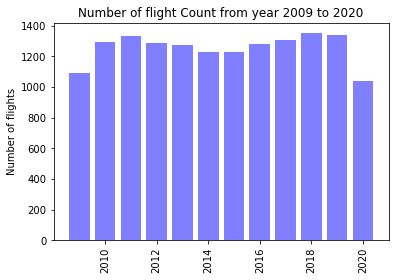

In [6]:
#Plot Number of flight Count from year 2009 to 2020"
plt.xticks(rotation='vertical')
plt.bar(yearcount.index, yearcount, color='b', alpha=0.5, align="center")
plt.title("Number of flight Count from year 2009 to 2020")
plt.ylabel("Number of flights")

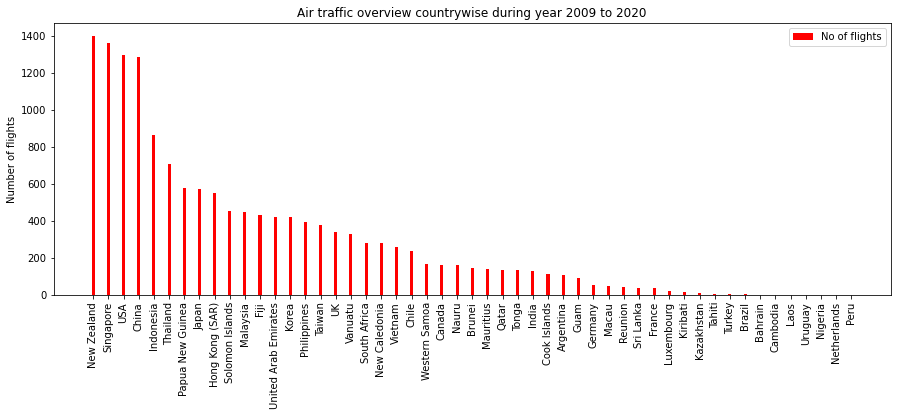

In [15]:
# Plot the Air traffic overview countrywise during year 2009 to 2020

# Country lables on X axis
Cntry_labels =  cntrycount.index

# the label locations
x = np.arange(len(year_labels))
width = 0.2  

# Plot graph
fig, ax = plt.subplots(figsize=(15,5))

yearcntbar = ax.bar(x, cntrycount, width, label='No of flights', color = "red")

ax.set_ylabel('Number of flights')
ax.set_title('Air traffic overview countrywise during year 2009 to 2020')
ax.set_xticks(x)
plt.xticks(rotation='vertical')
ax.set_xticklabels(Cntry_labels)
ax.legend()

In [16]:
# Top 10 countries during during year 2009 to 2020
topcntry = cntrycount.nlargest(15, 'all')
topcntry

New Zealand             1398
Singapore               1363
USA                     1298
China                   1286
Indonesia                866
Thailand                 708
Papua New Guinea         578
Japan                    573
Hong Kong (SAR)          551
Solomon Islands          454
Malaysia                 450
Fiji                     429
United Arab Emirates     421
Korea                    419
Philippines              393
Name: Country to/from, dtype: int64

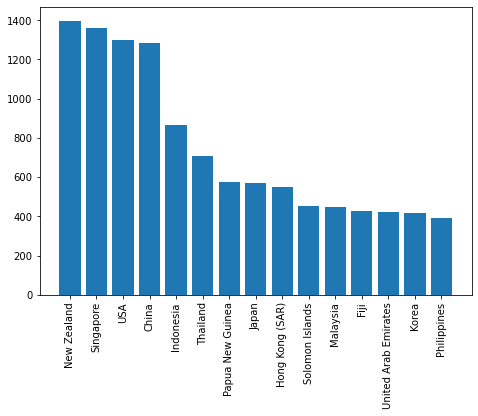

In [18]:
# Plot top 10 countries during during year 2009 to 2020
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xaxis = topcntry.index
yaxis = topcntry
ax.bar(xaxis,yaxis)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
# Plot bottom 10 countries during during year 2009 to 2020
bottomcntry = cntrycount.nsmallest(15, 'all')
bottomcntry

Uruguay         1
Nigeria         1
Netherlands     1
Peru            1
Bahrain         2
Cambodia        2
Laos            2
Turkey          3
Brazil          3
Tahiti          7
Kazakhstan     13
Kiribati       16
Luxembourg     20
France         37
Sri Lanka      38
Name: Country to/from, dtype: int64

<BarContainer object of 15 artists>

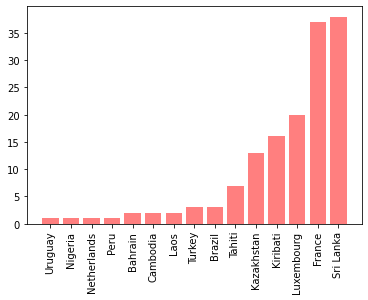

In [20]:
# Plot bottom 10 countries during during year 2009 to 2020
plt.xticks(rotation='vertical')
plt.bar(bottomcntry.index, bottomcntry, color='r', alpha=0.5, align="center")

In [24]:
Y19 = flightdata.loc[flightdata['Year'] == 2019]
Y20 = flightdata.loc[flightdata['Year'] == 2020]

In [25]:
Y20.head()

,Month,Country to/from,Passengers In,Freight In,Mail In,Passengers Out,Freight Out,Mail Out,Year
14014,Dec019,New Caledonia,"6,944",3.9,1.4,"5,827",98.3,10.8,2020
14015,Dec019,Canada,"16,792",319.0,17.0,"20,523",493.4,17.2,2020
14016,Dec019,New Zealand,169,1.5,0.0,144,0.0,0.0,2020
14017,Dec019,China,"18,332",299.1,38.0,"23,232",645.6,2.7,2020
14018,Dec019,India,"7,794",191.0,15.8,"8,536",190.5,0.0,2020
